The detection of accreted GC's will be done in this notebook. 
Delete rest of this later:
I am looking for GC's that are orbiting much further out than the rest of the stars. 
I am also looking for GC's with a characteristic metal rich gradient. 

In [33]:
#IMPORTS

import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
from astropy import units as u
import pandas as pd
from astropy.coordinates import SkyCoord, ICRS, Galactic, Galactocentric

In [31]:
# Read in the data
positions_df = pd.read_csv(r"C:\Users\vishn\Desktop\University(work)\PHYS3116 (Galaxies + Cosmology)\Computational Assignment\Data\HarrisPartI.csv")
velocities_df = pd.read_csv(r"C:\Users\vishn\Desktop\University(work)\PHYS3116 (Galaxies + Cosmology)\Computational Assignment\Data\HarrisPartIII.csv")
data_df = pd.merge(positions_df, velocities_df, on="ID")

cols = data_df.columns.tolist()
print(cols)

# Extract relevant columns
R_GC = data_df["R_gc"].values * u.kpc  # Galactocentric distance
v_LSR = data_df["v_LSR"].values * u.km / u.s  # Radial velocity
z = data_df["Z"].values * u.kpc  # Height above/below Galactic plane
l = data_df["L"].values * u.deg  # Galactic longitude
b = data_df["B"].values * u.deg  # Galactic latitude
R_sun = data_df["R_Sun"].values * u.kpc  # Distance from Sun

['ID', 'Name', 'RA', 'DEC', 'L', 'B', 'R_Sun', 'R_gc', 'X', 'Y', 'Z', 'v_r', 'v_r_e', 'v_LSR', 'sig_v', 'sig_v_e', 'c', 'r_c', 'r_h', 'mu_V', 'rho_0', 'lg_tc', 'lg_th']


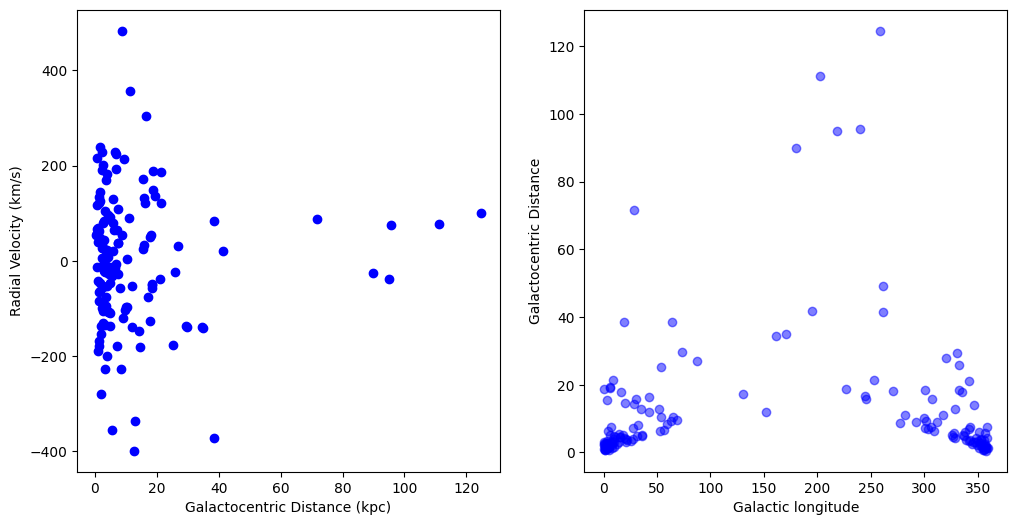

In [ ]:
# Plotting dynamical information (first try)
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
ax1.scatter(R_GC, v_LSR, c='blue', label='Radial Velocity vs Galactocentric Distance')
ax1.set_xlabel('Galactocentric Distance (kpc)')
ax1.set_ylabel('Radial Velocity (km/s)')

ax2 = plt.subplot(122)
ax2.scatter(l, R_GC, c = 'blue', alpha = 0.5, label = 'Radial Velocity vs Galactic Longitude')
ax2.set_xlabel('Galactic longitude')
ax2.set_ylabel('Galactocentric Distance')
plt.show()


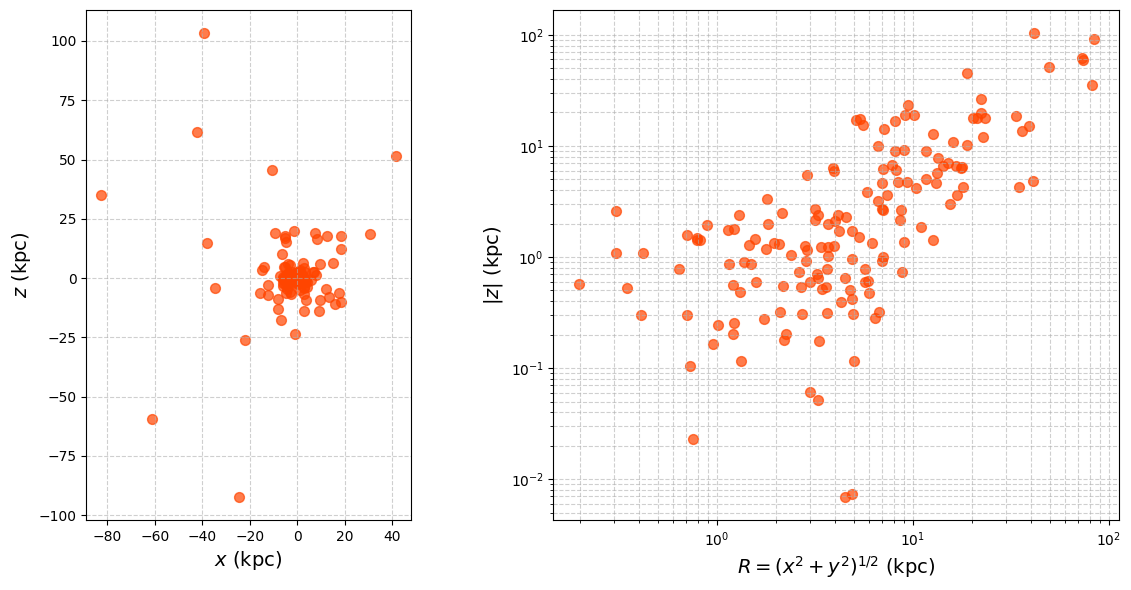

In [ ]:
# Spatial distribution testing and filtering by |z| < 3 kpc and R < 10 kpc
# To get the spatial distribution, first convert galactic coordinates to galactocentric coordinates
ap.coordinates.galactocentric_frame_defaults.set('v4.0')
gal = SkyCoord(l=l, b=b, distance=R_sun, frame='galactic')
galcen = gal_coords.transform_to(Galactocentric(galcen_distance=8.0*u.kpc, z_sun=0*u.pc))  # in line with harris catalogue

# store galactocentric coordinates in the data frame
data_df['x_gc'] = galcen.x.to(u.kpc).value
data_df['y_gc'] = galcen.y.to(u.kpc).value
data_df['z_gc'] = galcen.z.to(u.kpc).value

x_gc = data_df['x_gc'].values * u.kpc
y_gc = data_df['y_gc'].values * u.kpc
z_gc = data_df['z_gc'].values * u.kpc  # this is redundant, just keeping it here for the sake of consistency




# Plotting the spatial distributions of GC's 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Left subplot: x vs z
ax[0].scatter(x_gc, z_gc, s=50, color='orangered', alpha=0.7)
ax[0].set_xlabel(r"x (kpc)", fontsize=14)
ax[0].set_ylabel(r"z (kpc)", fontsize=14)
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[0].set_aspect('equal')

# Plotting R_xy vs |z|
R_xy = np.sqrt(x_gc**2 + y_gc**2)
z_abs = np.abs(z_gc)

ax[1].scatter(R_xy, z_abs, s=50, color='orangered', alpha=0.7)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r"R = (x^2 + y^2)^{1/2} (kpc)", fontsize=14)
ax[1].set_ylabel(r"|z| (kpc)", fontsize=14)
ax[1].grid(True, which="both", ls="--", alpha=0.6)

plt.tight_layout()
plt.show()